In [1398]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

In [1399]:
plt.rcParams['figure.figsize'] = [12,5]

# Import

In [1400]:
## Img 1 Confocal
#tuple import
cv_img_1_con_RFP = cv.imreadmulti('Data/1/confocal/1RFP.TIF', flags=2)[1]
cv_img_1_con_CY5 = cv.imreadmulti('Data/1/confocal/1CY5.TIF', flags=2)[1]

print(type(cv_img_1_con_RFP))

print("Multilayer TIFF shapes:")
print(len(cv_img_1_con_RFP))
print(cv_img_1_con_CY5)

# Img 1 superresoluted
#tuple import
cv_img_1_str_RFP = cv.imreadmulti('Data/1/super_resolution/1RFP.TIF', flags=2)[1]
cv_img_1_str_CY5 = cv.imreadmulti('Data/1/super_resolution/1CY5.TIF', flags=2)[1]



<class 'list'>
Multilayer TIFF shapes:
24
[array([[131, 130, 129, ..., 125, 126, 127],
       [127, 126, 125, ..., 121, 123, 124],
       [123, 123, 122, ..., 118, 120, 121],
       ...,
       [119, 119, 118, ..., 124, 124, 123],
       [119, 117, 115, ..., 122, 122, 122],
       [117, 116, 116, ..., 120, 121, 125]], dtype=uint16), array([[125, 124, 124, ..., 124, 124, 124],
       [120, 120, 120, ..., 121, 121, 121],
       [118, 118, 118, ..., 119, 120, 120],
       ...,
       [115, 116, 117, ..., 123, 122, 120],
       [114, 114, 116, ..., 122, 119, 117],
       [115, 116, 120, ..., 117, 116, 118]], dtype=uint16), array([[127, 126, 124, ..., 126, 126, 125],
       [123, 122, 120, ..., 121, 121, 121],
       [120, 120, 119, ..., 118, 118, 117],
       ...,
       [117, 117, 118, ..., 124, 122, 121],
       [118, 117, 116, ..., 121, 121, 121],
       [123, 123, 119, ..., 125, 126, 127]], dtype=uint16), array([[127, 125, 125, ..., 124, 123, 122],
       [123, 121, 121, ..., 120, 119,

# Analysis

## Image 1, structured illumination, slice 17 (index = 16)

In [1401]:
N_layers = len(cv_img_1_str_RFP)
print(N_layers)
ii = 16


19


## Gaussian thresholding

<class 'numpy.ndarray'>
(1400, 1400)
<class 'numpy.ndarray'>
[[ 4  6  3 ...  0  0  0]
 [ 8  6  4 ...  3  3  1]
 [ 4  2  2 ...  1  5  4]
 ...
 [ 1  0  0 ... 65 61 53]
 [ 0  0  2 ... 89 81 63]
 [ 3  2  0 ... 76 58 41]]


Text(0.5, 1.0, 'Binary image, Gaussian thresholding')

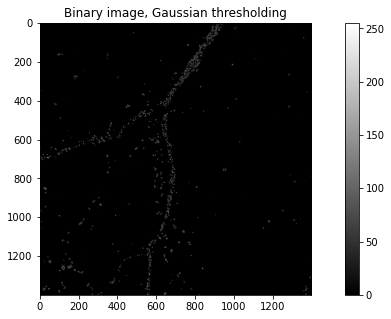

In [1402]:
#test_img = cv_img_1_str_RFP[ii]
#img = cv.cvtColor(test_img, cv.COLOR_BGR2GRAY)

print(type(cv_img_1_str_RFP[ii]))
print(cv_img_1_str_RFP[ii].shape)

test_img = np.array(cv_img_1_str_RFP[ii],dtype='uint8')

print(type(test_img))
print(test_img)


blockSize = 9
C = -70
th3 = cv.adaptiveThreshold(test_img, np.amax(test_img), cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,blockSize,C)


fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(th3, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Binary image, Gaussian thresholding")

# Axon Slice

Text(0.5, 1.0, 'Binary image, Gaussian thresholding')

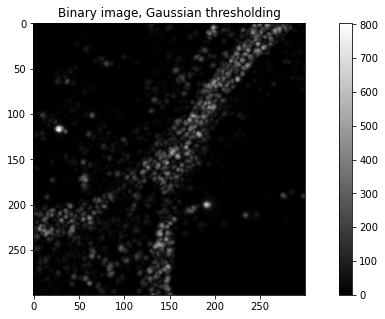

In [1403]:
x_center = 650
y_center = 400

width = 300

x_bound_low = int(x_center-width/2)
x_bound_up = int(x_center+width/2)

y_bound_low = int(y_center-width/2)
y_bound_up = int(y_center+width/2)


slice_img = cv_img_1_str_RFP[ii][y_bound_low:y_bound_up,x_bound_low:x_bound_up]

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(slice_img, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Binary image, Gaussian thresholding")

Text(0.5, 1.0, 'Binary image, Gaussian thresholding')

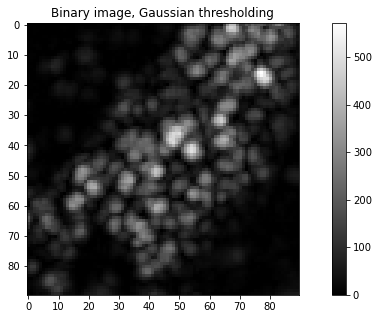

In [1404]:
x_center = 650
y_center = 400

width = 90

x_bound_low = int(x_center-width/2)
x_bound_up = int(x_center+width/2)

y_bound_low = int(y_center-width/2)
y_bound_up = int(y_center+width/2)


slice_img_2 = cv_img_1_str_RFP[ii][y_bound_low:y_bound_up,x_bound_low:x_bound_up]

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(slice_img_2, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Binary image, Gaussian thresholding")

Text(0.5, 1.0, 'Binary image, Gaussian thresholding')

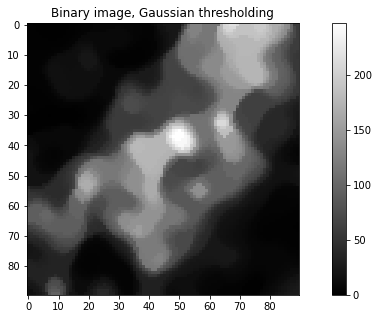

In [1405]:
kernel_erosion = np.ones((6,6),np.uint8)
erosion = cv.erode(slice_img_2,kernel_erosion,iterations = 1)


kernel_dil = np.ones((3,3),np.uint8)
dilation = cv.dilate(slice_img_2,kernel_dil,iterations = 1)

median = cv.medianBlur(slice_img_2,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(median, cmap="gray")
fig.colorbar(pos, ax=ax)
plt.title("Binary image, Gaussian thresholding")

# Morphological filtering

In [1406]:
img = cv_img_1_str_RFP[ii]

#Erosion on image RFP



#list of operations

ret,img = cv.threshold(img,60,1,cv.THRESH_TOZERO)
median = cv.medianBlur(img,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)
median = cv.medianBlur(median,5)

kernel_cl1 = np.ones((25,25),np.uint8)
closing = cv.morphologyEx(median, cv.MORPH_CLOSE, kernel_cl1)

kernel_op = np.ones((8,8),np.uint8)
opening = cv.morphologyEx(median, cv.MORPH_OPEN, kernel_op)

kernel_cl2 = np.ones((2,2),np.uint8)
temp_img = cv.morphologyEx(opening, cv.MORPH_CLOSE, kernel_cl2)

ret,temp_img = cv.threshold(temp_img,30,1,cv.THRESH_TOZERO)

kernel_op = np.ones((12,12),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_OPEN, kernel_op)

kernel_cl2 = np.ones((2,2),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl2)


ret,final_img = cv.threshold(temp_img,30,1,cv.THRESH_BINARY)

Text(0.5, 1.0, 'Binary image, Gaussian thresholding')

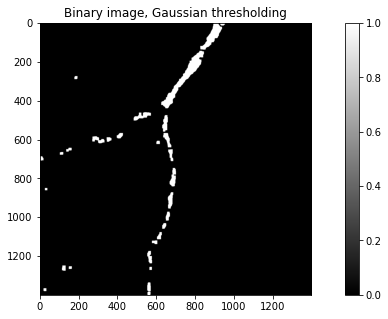

In [1407]:
fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(final_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Gaussian thresholding")

Text(0.5, 1.0, 'RFP')

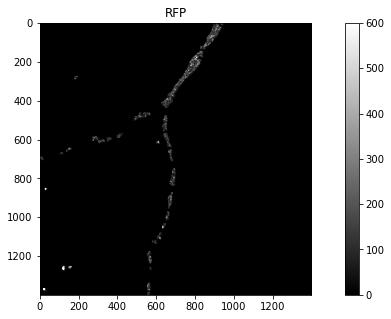

In [1408]:
filtered = final_img * cv_img_1_str_RFP[ii]

fig = plt.figure()
ax = fig.gca()
pos = ax.imshow(filtered, cmap="gray")
pos.set_clim(0,600)
fig.colorbar(pos, ax=ax)
ax.set_title("RFP")

Text(0.5, 1.0, 'RFP')

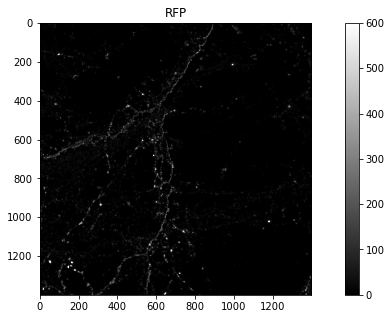

In [1409]:
filtered_negative = (1-final_img) *  cv_img_1_str_RFP[ii]

fig = plt.figure()
ax = fig.gca()
pos = ax.imshow(filtered_negative, cmap="gray")
pos.set_clim(0,600)
fig.colorbar(pos, ax=ax)
ax.set_title("RFP")

Ipotesi:
-togliere puntini isolati
-connettere dentriti/assoni con spessore sufficiente

# Test 2

In [1410]:
img = cv_img_1_str_RFP[ii]


#list of operations

ret,temp_img = cv.threshold(img,60,1,cv.THRESH_TOZERO)

kernel_cl1 = np.ones((14,14),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl1)

kernel_op1 = np.ones((7,7),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_OPEN, kernel_op1)


ret,final_img = cv.threshold(temp_img,20,1,cv.THRESH_BINARY)

Text(0.5, 1.0, 'Binary image, Processed')

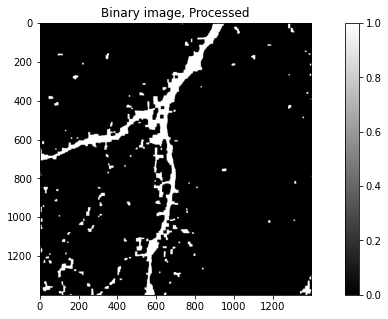

In [1411]:
fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(final_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Binary image, Processed')

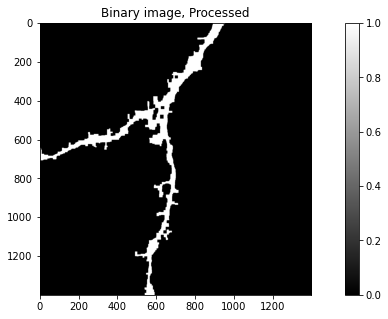

In [1412]:
def get_biggest_object (image):
    image = image.astype('uint8')
    nb_components, output, stats, centroids = cv.connectedComponentsWithStats(image, connectivity=4)
    sizes = stats[:, -1]

    max_label = 1
    max_size = sizes[1]
    for i in range(2, nb_components):
        if sizes[i] > max_size:
            max_label = i
            max_size = sizes[i]

    img2 = np.zeros(output.shape)
    img2[output == max_label] = 1
    return img2

final_component = get_biggest_object(final_img)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(final_component, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Unfiltered')

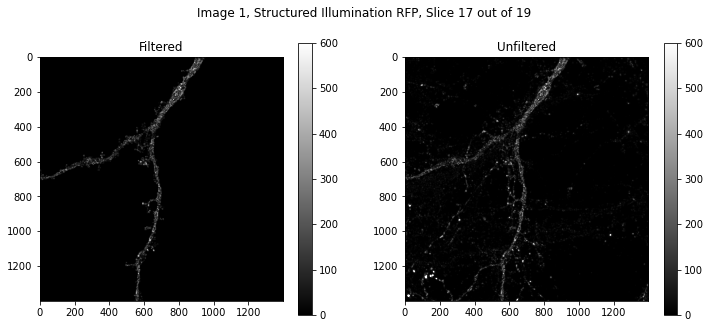

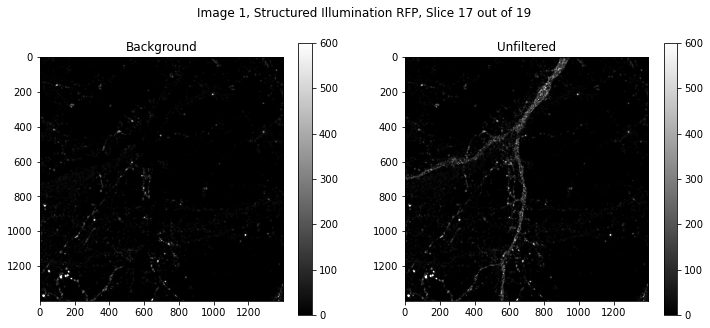

In [1413]:
final_processed = final_component * cv_img_1_str_RFP[ii]

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(final_processed, cmap="gray")
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Filtered")




pos2 = ax2.imshow(cv_img_1_str_RFP[ii], cmap="gray")
pos2.set_clim(0,600)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")



filtered_negative = (1-final_processed) *  cv_img_1_str_RFP[ii]

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(filtered_negative, cmap="gray")
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Background")

pos2 = ax2.imshow(cv_img_1_str_RFP[ii], cmap="gray")
pos2.set_clim(0,600)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")

# Image 2

In [1414]:
## Img 2 Confocal
#tuple import
cv_img_2_con_RFP = cv.imreadmulti('Data/2/confocal/2RFP.TIF', flags=2)[1]
cv_img_2_con_CY5 = cv.imreadmulti('Data/2/confocal/2CY5.TIF', flags=2)[1]

print(type(cv_img_2_con_RFP))

print("Multilayer TIFF shapes:")
print(len(cv_img_2_con_RFP))
print(cv_img_2_con_CY5)

# Img 2 superresoluted
#tuple import
cv_img_2_str_RFP = cv.imreadmulti('Data/2/super_resolution/3_VCS_w1VCS_100X_RFP.TIF', flags=2)[1]
cv_img_2_str_CY5 = cv.imreadmulti('Data/2/super_resolution/3_VCS_w2VCS_100X_CY5.TIF', flags=2)[1]



<class 'list'>
Multilayer TIFF shapes:
0
[]


RFP max camera value, layer  15 : 6031
CY5 max camera value, layer  15 : 55


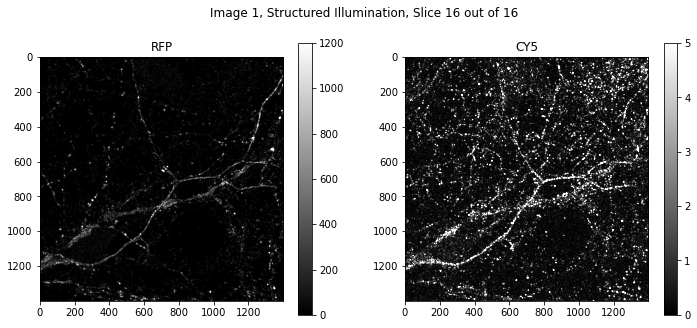

In [1415]:
N_layers = len(cv_img_2_str_RFP)
ii = 15

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(cv_img_2_str_RFP[ii], cmap="gray")
pos1.set_clim(0,1200)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("RFP")




pos2 = ax2.imshow(cv_img_2_str_CY5[ii], cmap="gray")
pos2.set_clim(0,5)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("CY5")

print("RFP max camera value, layer ", ii, ":", np.amax(cv_img_2_str_RFP[ii]))
print("CY5 max camera value, layer ", ii, ":", np.amax(cv_img_2_str_CY5[ii]))



In [1416]:
img = cv_img_2_str_RFP[ii]

Text(0.5, 1.0, 'Binary image, Processed')

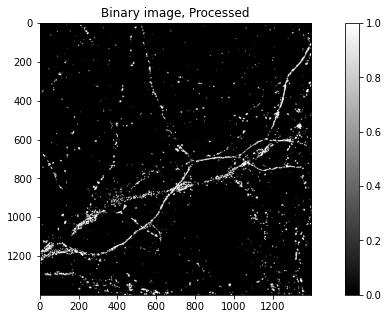

In [1417]:
ret,temp_img = cv.threshold(img,250,1,cv.THRESH_BINARY)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Binary image, Processed')

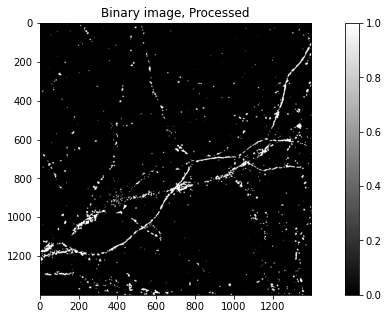

In [1418]:
temp_img = cv.medianBlur(temp_img,5)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Binary image, Processed')

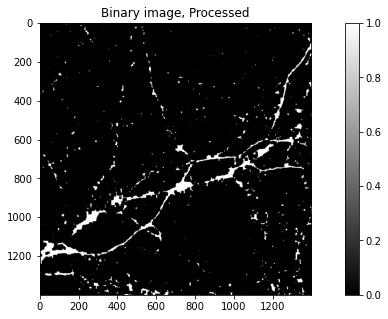

In [1419]:

kernel_cl1 = np.ones((12,12),np.uint8)
temp_img = cv.morphologyEx(temp_img, cv.MORPH_CLOSE, kernel_cl1)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")


Text(0.5, 1.0, 'Binary image, Processed')

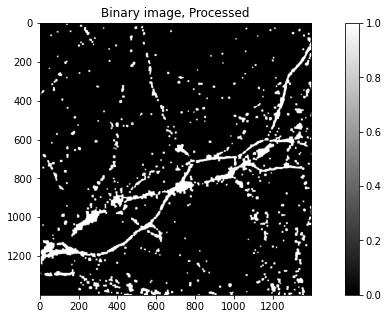

In [1420]:
kernel_dil = np.ones((6,6),np.uint8)
temp_img = cv.dilate(temp_img,kernel_dil,iterations = 1)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(temp_img, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Binary image, Processed')

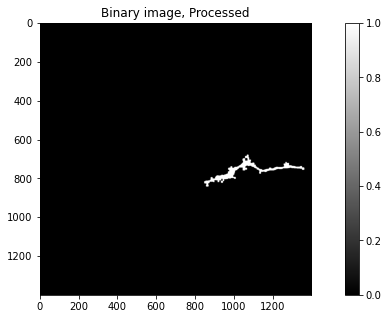

In [1421]:
final_component = get_biggest_object(temp_img)

fig= plt.figure()
ax = fig.gca()
pos = ax.imshow(final_component, cmap="gray")
fig.colorbar(pos, ax=ax)
pos.set_clim(0,1)
plt.title("Binary image, Processed")

Text(0.5, 1.0, 'Unfiltered')

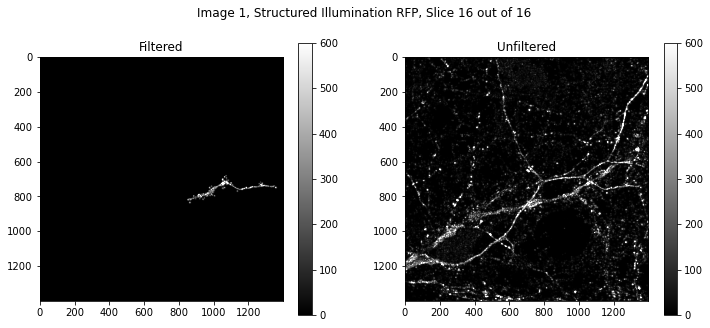

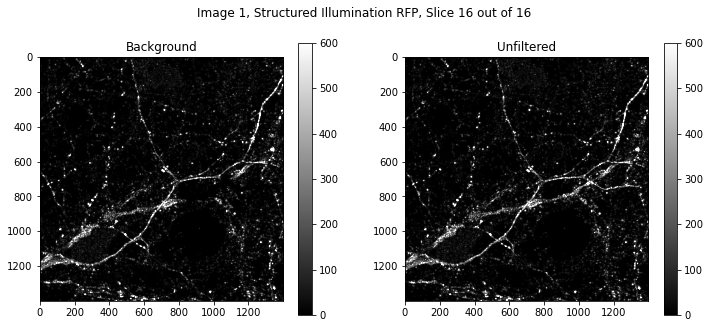

In [1422]:
final_processed = final_component * cv_img_2_str_RFP[ii]

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(final_processed, cmap="gray")
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Filtered")




pos2 = ax2.imshow(cv_img_2_str_RFP[ii], cmap="gray")
pos2.set_clim(0,600)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")



filtered_negative = (1-final_processed) *  cv_img_2_str_RFP[ii]

fig, (ax1,ax2) = plt.subplots(1,2)
    
fig.suptitle("Image 1, Structured Illumination RFP, Slice " + str(ii+1) + " out of " + str(N_layers))

pos1 = ax1.imshow(filtered_negative, cmap="gray")
pos1.set_clim(0,600)
fig.colorbar(pos1, ax=ax1)
ax1.set_title("Background")

pos2 = ax2.imshow(cv_img_2_str_RFP[ii], cmap="gray")
pos2.set_clim(0,600)
fig.colorbar(pos2, ax=ax2)
ax2.set_title("Unfiltered")

Maybe do cross usage ? confocal images could be good to make masks and filters
also cy5/rfp usage